In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier

from tabulate import tabulate

Data upload

In [3]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 2nd month\datasets\Mental-Health-Twitter.csv")

Data exploration

In [4]:
df.head(3)

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


Encoding

In [26]:
cat_cols = df.select_dtypes(exclude='number').columns
le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

Feature Transformation

In [22]:
df['post_created'] = pd.to_datetime(df['post_created'], errors='coerce')

In [25]:
df['year'] = df['post_created'].dt.year
df['month'] = df['post_created'].dt.month
df['day'] = df['post_created'].dt.day
df['hour'] = df['post_created'].dt.hour
df['minute'] = df['post_created'].dt.minute
df.drop(columns=['post_created'], inplace=True)

In [8]:
df.drop(columns=['post_id', 'Unnamed: 0', 'user_id'], inplace=True)

In [10]:
num_cols = df.select_dtypes(include='number').columns
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)

retweets        31.814769
friends         13.498313
followers       12.162252
statuses         6.822264
favourites       1.500665
post_created     0.000911
label            0.000000
post_text       -0.000252
dtype: float64


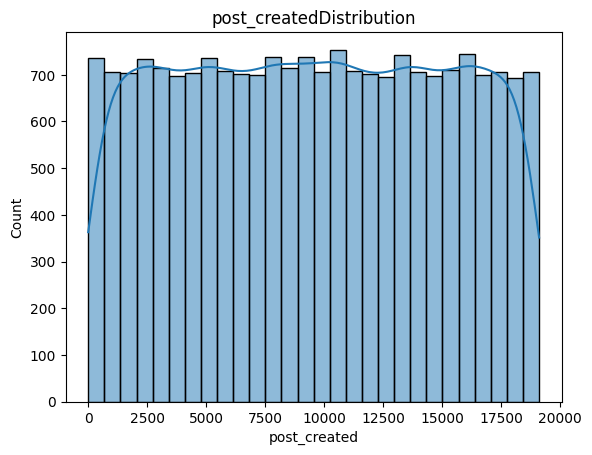

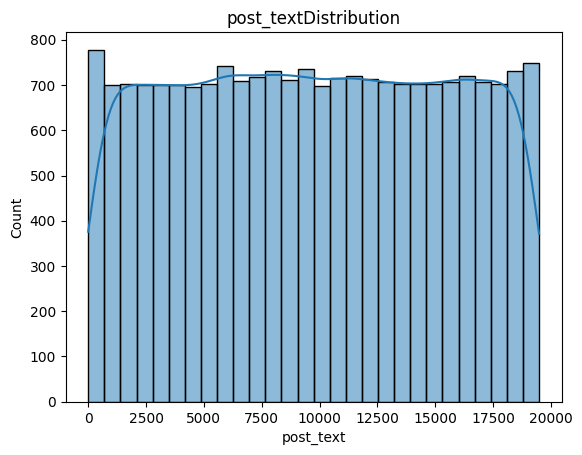

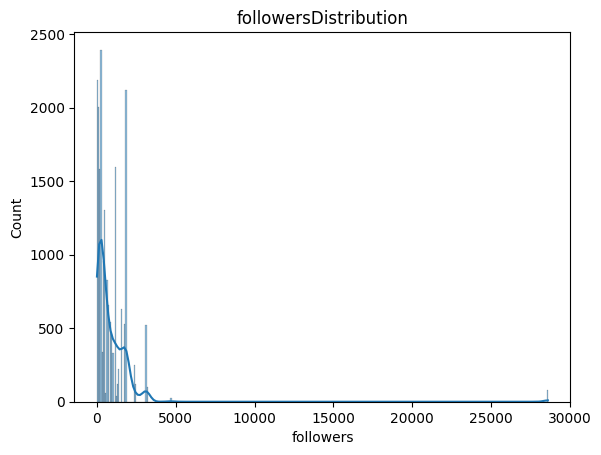

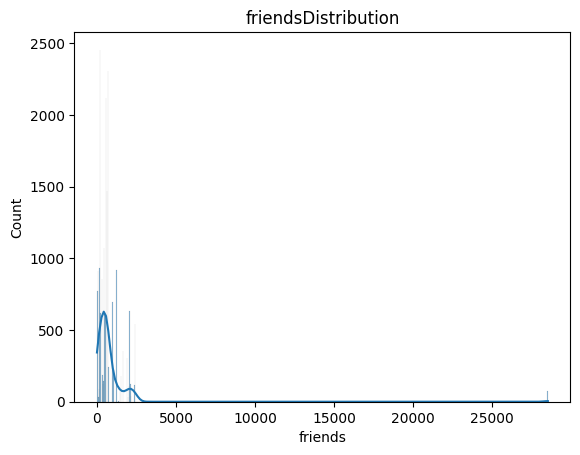

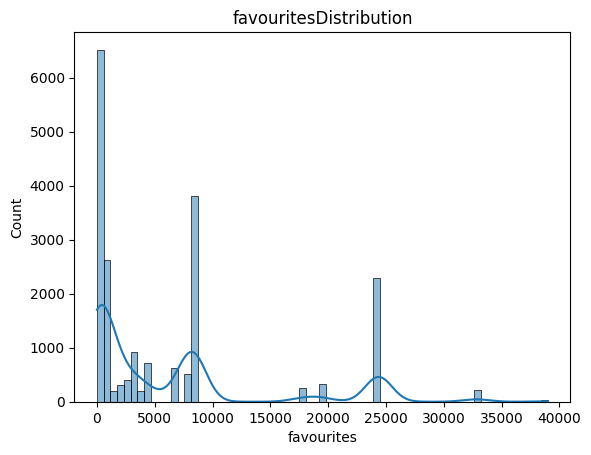

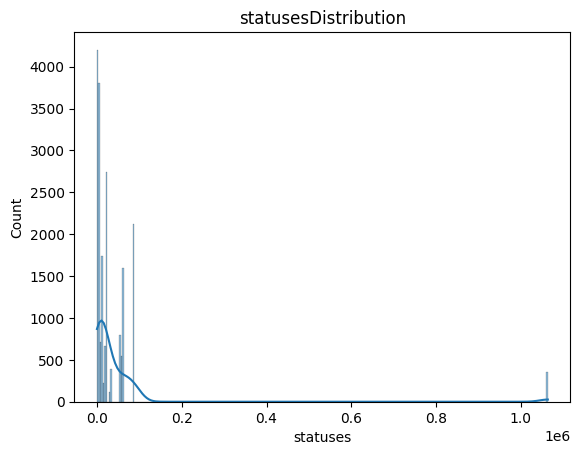

In [ ]:
for col in num_cols:
  sns.histplot(df[col], kde=True)
  plt.title(f"{col}Distribution")
  plt.show()

In [11]:
for col in num_cols:
  if skewness[col] > 0.5:
    df[col] = np.log1p(df[col])
  elif skewness[col] < -0.5:
    df[col] = np.sqrt(df[col])

In [12]:
print(skewness)

retweets        31.814769
friends         13.498313
followers       12.162252
statuses         6.822264
favourites       1.500665
post_created     0.000911
label            0.000000
post_text       -0.000252
dtype: float64


Mutual Information


In [13]:
x = df[num_cols]
y = df['label']

mi_score = mutual_info_classif(x, y)
mi_df = pd.DataFrame(mi_score, index=x.columns).sort_values(by=[0], ascending=False)

mi_df

,0
label,0.695697
friends,0.692989
statuses,0.692686
post_created,0.688093
followers,0.683553
favourites,0.651735
post_text,0.304375
retweets,0.005388


Scaling

In [14]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,-0.296007,0.030823,-1.232743,-0.515365,-0.448731,-1.772053,-0.433082,1.0
1,-0.296189,0.026216,-1.232743,-0.515365,-0.448731,-1.772053,-0.148295,1.0
2,-0.775578,-0.585242,-1.232743,-0.515365,-0.448731,-1.772053,-0.433082,1.0
3,-0.779028,0.680021,-1.232743,-0.515365,-0.448731,-1.772053,0.018295,1.0
4,-0.779210,0.039327,-1.232743,-0.515365,-0.448731,-1.772053,-0.148295,1.0


Model selection

In [16]:
x = df.drop(columns=['label'])
y = df['label']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
x_train.shape, y_train.shape

((16000, 7), (16000,))

In [18]:
x_val.shape, y_val.shape

((2000, 7), (2000,))

Model training

In [19]:
model = RandomForestClassifier(random_state=42)
rf = model.fit(x_train, y_train)

In [20]:
y_pred = rf.predict(x_val)
y_pred

array([-1., -1.,  1., ...,  1.,  1., -1.], shape=(2000,))

In [58]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       961
         1.0       1.00      1.00      1.00      1039

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [76]:
# Without feature engineering
  # precision: 0.92
  # f1-score: 0.95
  # recall: 0.89

In [77]:
cr = classification_report(y_val, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

headers = ['Status', 'Precision', 'Recall', 'F1-Score',]

data = [
  ['Feature Engineering ❌', 0.92, 0.95, 0.89,],
 [ 'Feature Engineering ✅', f"{1.00}", 1.00, 1.00]
]

table = tabulate(data, headers=headers, tablefmt='grid')
print(table)

+------------------------+-------------+----------+------------+
| Status                 |   Precision |   Recall |   F1-Score |
+========================+=============+==========+============+
| Feature Engineering ❌ |        0.92 |     0.95 |       0.89 |
+------------------------+-------------+----------+------------+
| Feature Engineering ✅ |        1    |     1    |       1    |
+------------------------+-------------+----------+------------+
